# Cross Validation

To see this, imagine you have a dataset with 5000 rows. You will typically keep about 20% of the data as a validation dataset, or 1000 rows. But this leaves some random chance in determining model scores. That is, a model might do well on one set of 1000 rows, even if it would be inaccurate on a different 1000 rows.

At an extreme, you could imagine having only 1 row of data in the validation set. If you compare alternative models, which one makes the best predictions on a single data point will be mostly a matter of luck!

In general, the larger the validation set, the less randomness (aka "noise") there is in our measure of model quality, and the more reliable it will be. Unfortunately, we can only get a large validation set by removing rows from our training data, and smaller training datasets mean worse models!

In cross-validation, we run our modeling process on different subsets of the data to get multiple measures of model quality.

We learned that from DWH and BI. For example if we have A,B,C,D,E,F variables.

In first round we will take A as valid data and B to F as training set.

In second round we will take B as valid sata, and sets A, C to F as training data. We are going thorugh all variables, 100% of the data is used as valid data at some point. Finally we measure model quality based on all rows in dataset.

When should you use cross-validation?

Cross-validation gives a more accurate measure of model quality, which is especially important if you are making a lot of modeling decisions. However, it can take longer to run, because it estimates multiple models (one for each fold).

So, given these tradeoffs, when should you use each approach?

* For small datasets, where extra computational burden isn't a big deal, you should run cross-validation.
* For larger datasets, a single validation set is sufficient. Your code will run faster, and you may have enough data that there's little need to re-use some of it for holdout.
There's no simple threshold for what constitutes a large vs. small dataset. But if your model takes a couple minutes or less to run, it's probably worth switching to cross-validation.

Alternatively, you can run cross-validation and see if the scores for each experiment seem close. If each experiment yields the same results, a single validation set is probably sufficient.

In [1]:
import pandas as pd

data=pd.read_csv('melb_data.csv')

In [2]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [3]:
# we will take only few columns

cols_to_use=['Rooms','Distance','Landsize','BuildingArea', 'YearBuilt']

In [4]:
X=data[cols_to_use]

In [5]:
y=data.Price

Then, we define a pipeline that uses an imputer to fill in missing values and a random forest model to make predictions.

While it's possible to do cross-validation without pipelines, it is quite difficult! Using a pipeline will make the code remarkably straightforward.

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', RandomForestRegressor(n_estimators=50,
                                                              random_state=0))])
# we did preprocessor and model selection in steps
                              

Now we implement cross_validation score. We se number of folds in cv parameter.

In [7]:
from sklearn.model_selection import cross_val_score


In [8]:
scores=-1* cross_val_score(my_pipeline, X, y, cv=5, scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

MAE scores:
 [301628.7893587  303164.4782723  287298.331666   236061.84754543
 260383.45111427]


* What we did here is first multiply by -1 since sklearn calculates negative MAE.
* we took created pipeline, data, numver of folds, and scoring.

Scoring is defined as : 


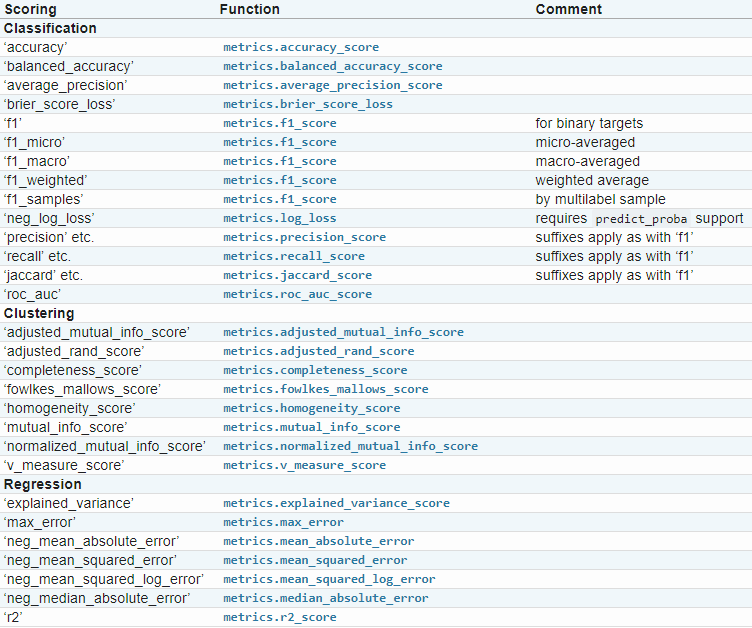

In [13]:
from IPython.display import Image 
Image(filename='Data_scoring.PNG')

In [14]:
print("Average MAE score (across experiments):")
print(scores.mean())

Average MAE score (across experiments):
277707.3795913405


Using cross-validation yields a much better measure of model quality, with the added benefit of cleaning up our code: note that we no longer need to keep track of separate training and validation sets. So, especially for small datasets, it's a good improvement!